In [42]:
# ライブラリのインポート
import numpy as np
import pandas as pd

# Add by myself
df = pd.read_csv(r'Boston Housing.csv')

df.columns = ['crim','zn','indus','chas','nox','rm','age','dis','rad','tax','ptratio','b','lstat','medv' ]
df.head()


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


/opt/anaconda3/envs/Shinagawa/lib/python3.12/site-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


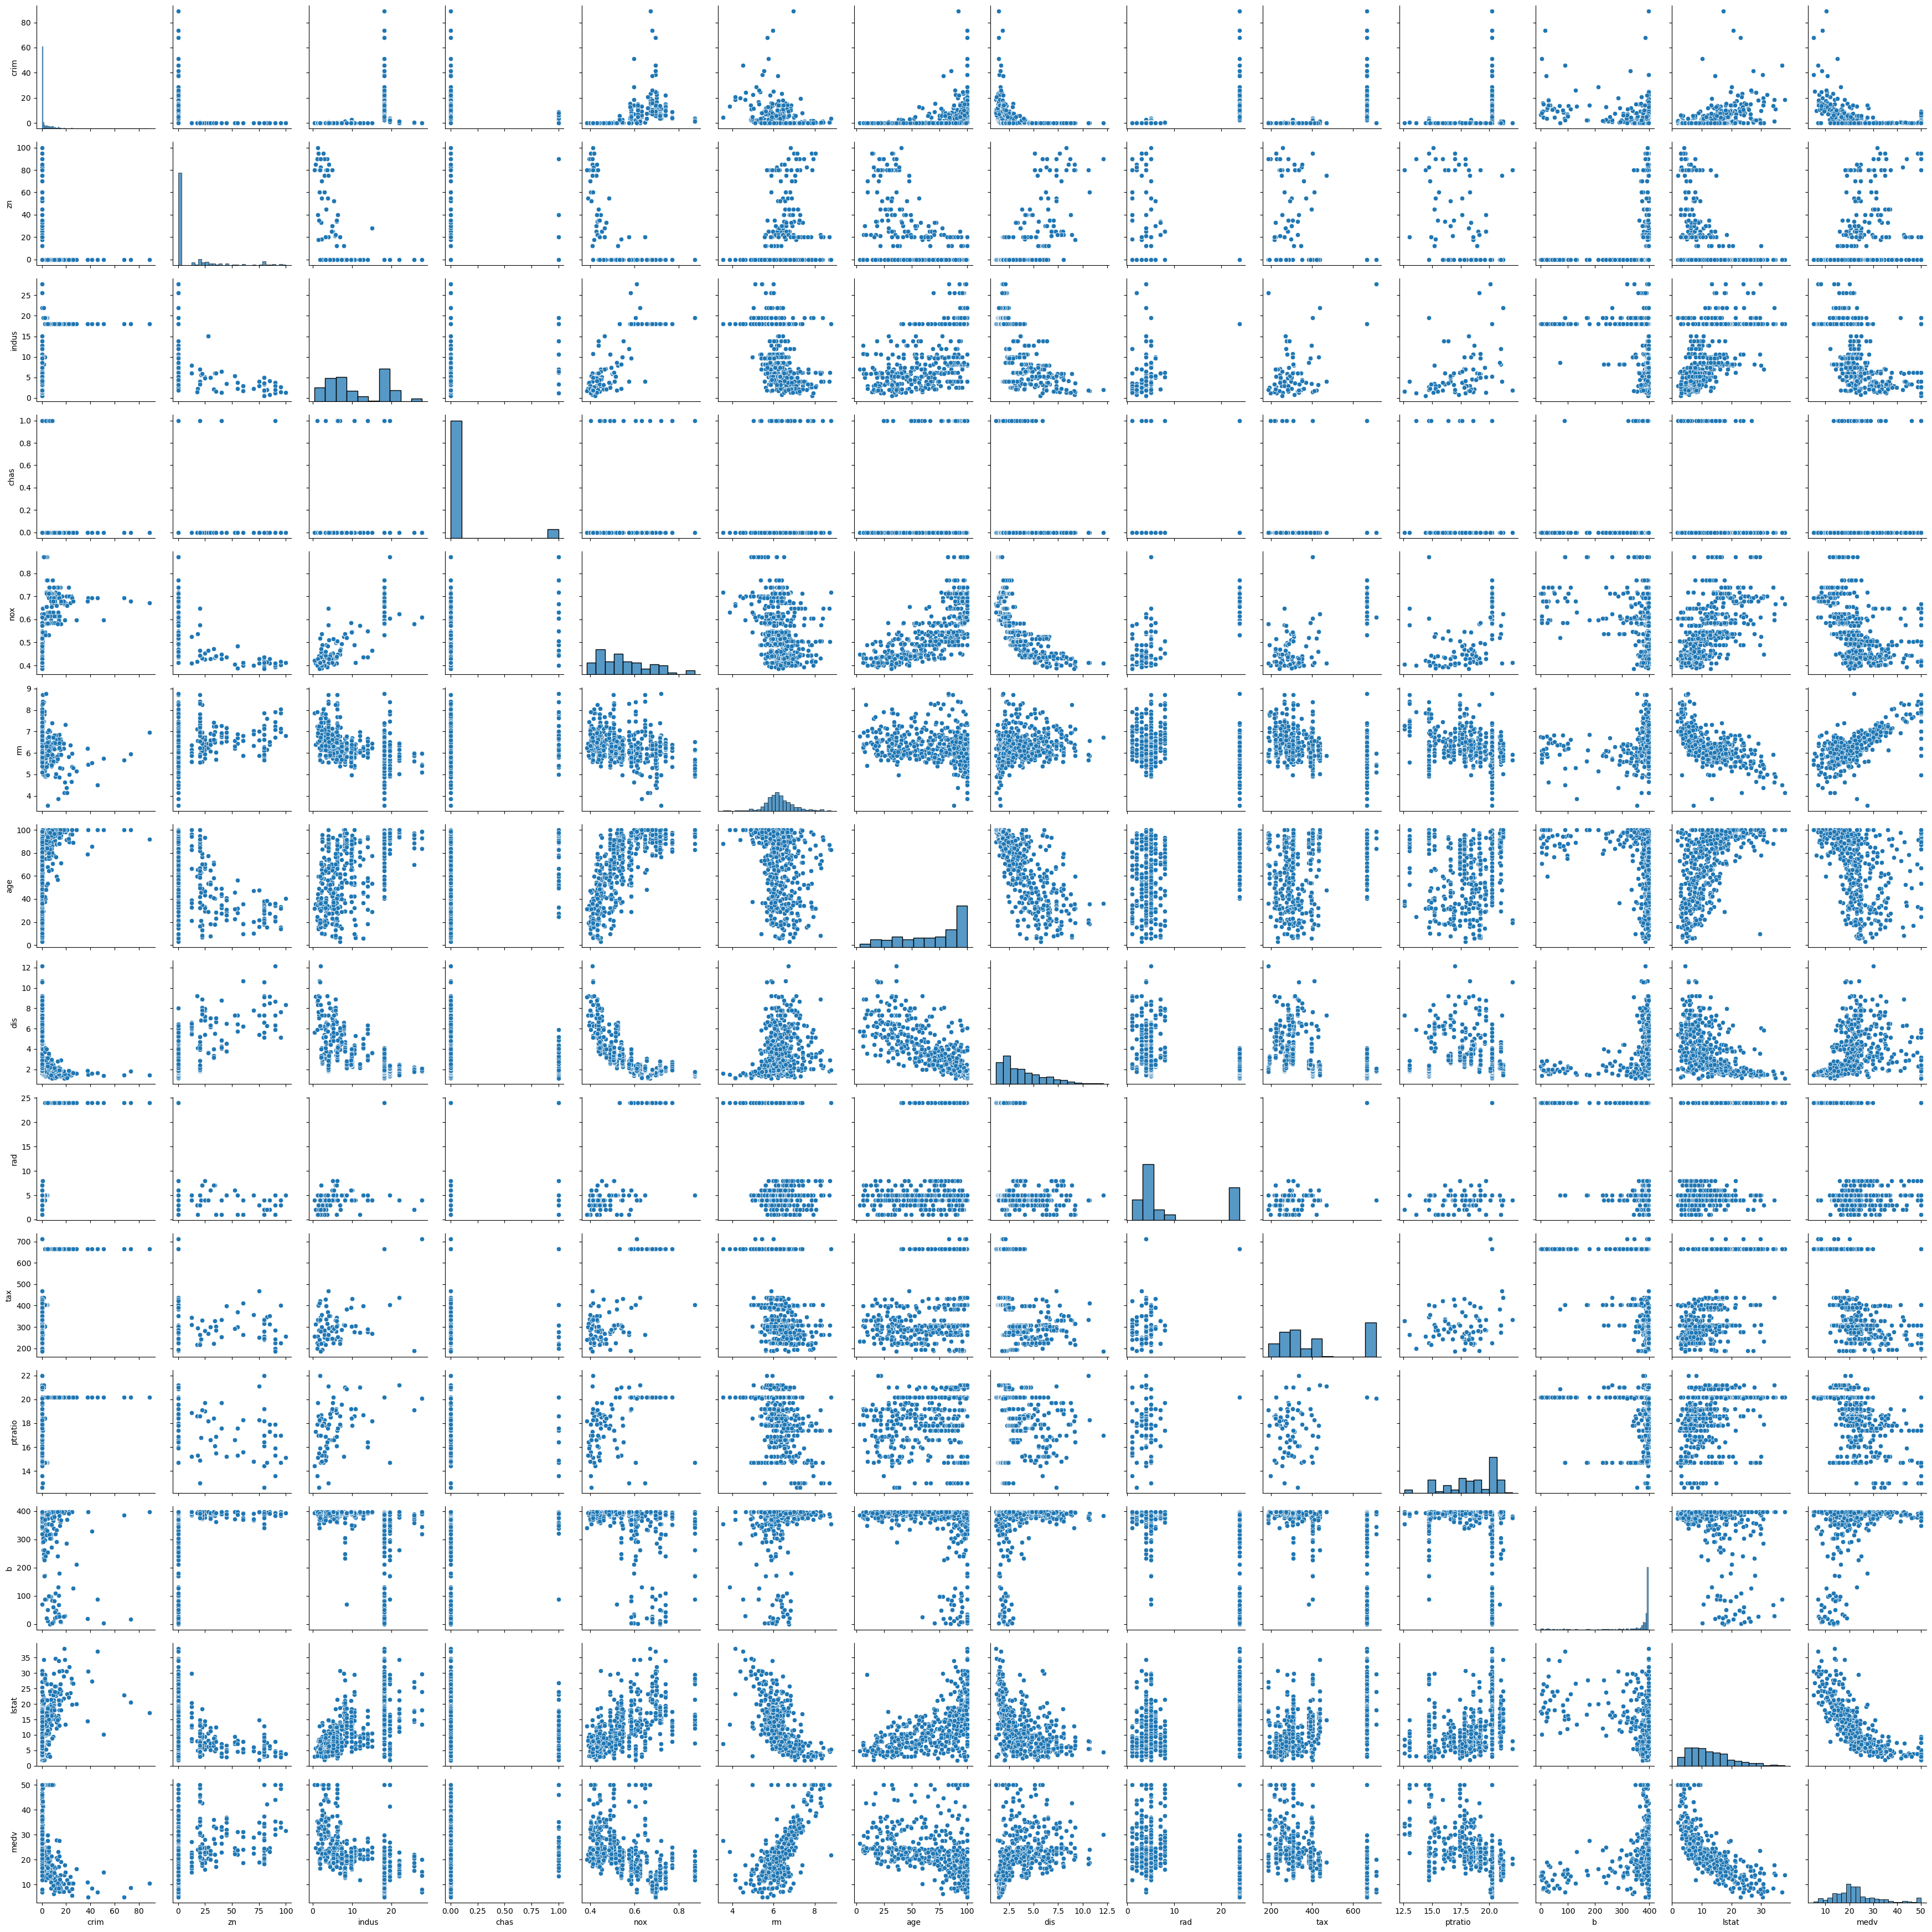

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

#cols = ['lstat','indus','nox','rm','medv']

sns.pairplot(df, size=2.5)
plt.tight_layout()
plt.show()

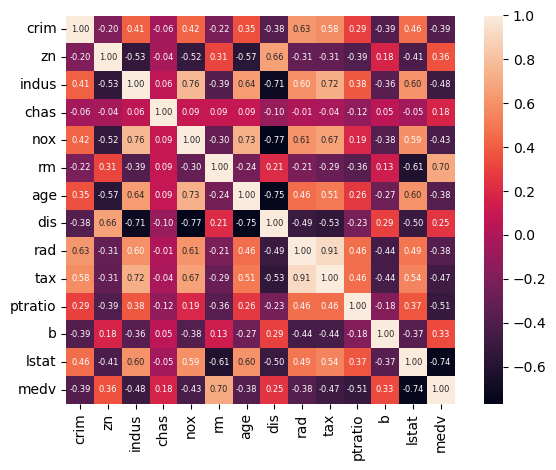

In [52]:
import numpy as np

cm = np.corrcoef(df.values.T)
hm = sns.heatmap(cm,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size':6},
                 yticklabels=df.columns,
                 xticklabels=df.columns)
plt.tight_layout()
plt.show()

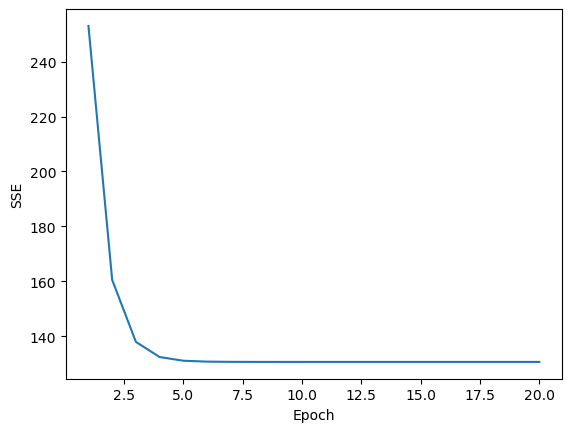

In [18]:
# 最小二乗線形回帰モデル

class LinearRegressionGD(object):
# 初期化を実施する
    def __init__(self, eta=0.001, n_iter=20):
        self.eta = eta
        self.n_iter = n_iter

    # トレーニングを実施するfit
    def fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            output = self.net_input(X)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    # 総入力を計算する net_input
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    # 予測値を計算する predict
    def predict(self, X):
        return self.net_input(X)

# 結果を確認する
X = df[['rm']].values
Y = df['medv'].values
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
X_std = sc_x.fit_transform(X)
Y_std = sc_y.fit_transform(Y[:, np.newaxis]).flatten()
lr = LinearRegressionGD()
lr.fit(X_std, Y_std)

plt.plot(range(1, lr.n_iter+1), lr.cost_)
plt.ylabel('SSE')
plt.xlabel('Epoch')
plt.show()

Text(0, 0.5, 'Price in $1000s [medv] (standardized)')

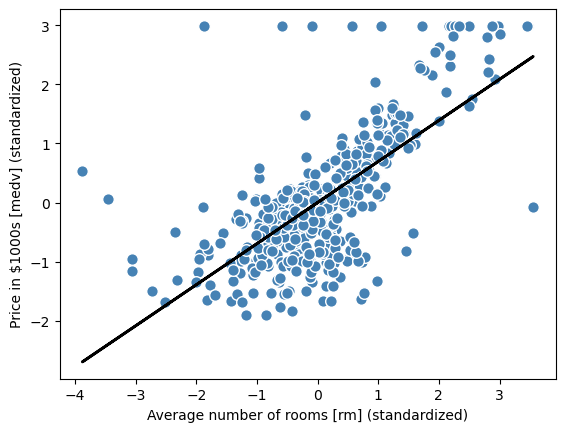

In [19]:
# 適合度の可視化
def lin_regplot(x,y,model):
    plt.scatter(x,y,c='steelblue', edgecolor='white', s=70)
    plt.plot(x, model.predict(x), color='black',lw=2)
    return

lin_regplot(X_std, Y_std, lr)
plt.xlabel('Average number of rooms [rm] (standardized)')
plt.ylabel('Price in $1000s [medv] (standardized)')

In [44]:
from matplotlib.pyplot import axes

#画图了解数据，plot
#sns.scatterplot(ax=axes[0, 0], x='', y='', data=df),axes[0, 0].set_title('')
#数据直方图
#df.hist(bins=50,figsize=(20,15))

from sklearn.impute import SimpleImputer
# 建立imputer，使用均值填充缺失值 'mean'：使用均值填补缺失值（适用于数值特征）。
imputer = SimpleImputer(strategy='mean')
# 进行拟合和转换 
X_imputed = imputer.fit_transform(X)
# 删除包含缺失值的样本 
df_cleaned = df.dropna()

#标准化：使用StandardScaler来标准化数据，使其均值为0，方差为1。
from sklearn.preprocessing import StandardScaler  
# 示例数据 
# 标准化 
scaler = StandardScaler() 
X_scaled = scaler.fit_transform(X)

#归一化：使用MinMaxScaler将数据缩放到特定范围（通常是0到1）。
from sklearn.preprocessing import MinMaxScaler
# 归一化
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

#拆分特征和标签
X = df.drop(['medv'], axis = 1)
Y = df['rm']

#用train_test_split来分割数据集
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=1)

from sklearn import linear_model
clf = linear_model.LinearRegression()
clf.fit(X_train, y_train)

#查看训练结果的参数
print(clf.intercept_)
print(clf.coef_)

#用score评测
score = clf.score(X_test, y_test)
print(score)

#交叉验证 cv=5，将数据集分成5个子集，进行5次训练和评估
from sklearn.model_selection import cross_val_score 
scores = cross_val_score(clf, X, Y, cv=5)
print("Cross-validation scores:", scores)

ValueError: Expected a 2-dimensional container but got <class 'pandas.core.series.Series'> instead. Pass a DataFrame containing a single row (i.e. single sample) or a single column (i.e. single feature) instead.